In [2]:
# 02_clustering.ipynb

import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Load cleaned data
df = pd.read_csv("../data/listings_cleaned.csv")
X = df.drop(columns=['price'])

In [6]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [8]:
# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X)
sil_score = silhouette_score(X, df['cluster_kmeans'])
print(f"KMeans Silhouette Score: {sil_score:.2f}")

KMeans Silhouette Score: 0.49


In [10]:
# Save with cluster labels
df.to_csv("../data/listings_clustered.csv", index=False)

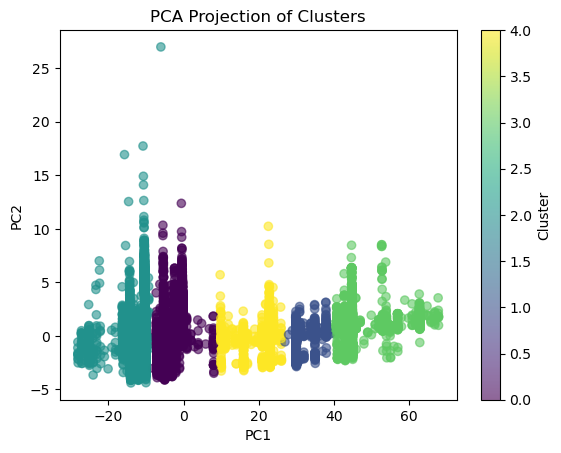

In [12]:
# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster_kmeans'], cmap='viridis', alpha=0.6)
plt.title("PCA Projection of Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()